In [80]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [81]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [82]:
df = pd.read_csv('Train.csv')
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,FP-2 pIC50 (uM)
0,0,-1.7616,3.103235,63.7293,78.280825,18,18,66,41,25,...,83.993479,2.048621,34.064095,18.736877,12.809614,5788.0,68.0,4.894,216.0,4.786748
1,0,-0.2864,0.082025,35.9367,51.005895,17,18,40,25,15,...,50.633970,2.025359,22.966476,5.077089,12.324973,1713.0,35.0,4.202,128.0,5.236572
2,0,-1.6982,2.883883,67.5532,68.066618,12,12,57,31,26,...,62.201948,2.006514,25.902949,12.501332,6.478960,3056.0,48.0,4.279,160.0,6.853872
3,0,-1.9096,3.646572,25.3604,59.650274,22,23,48,30,18,...,61.653743,2.055125,16.365920,10.101942,6.263978,2695.0,50.0,5.554,158.0,5.337242
4,0,-0.2266,0.051348,76.0728,60.954204,6,6,54,26,28,...,51.539400,1.982285,16.801571,5.118101,9.140872,1828.0,36.0,5.063,128.0,4.314258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,-3.0982,9.598843,91.0329,100.488892,18,18,88,44,44,...,88.247274,2.005620,28.550281,13.040374,12.076740,8004.0,56.0,11.177,210.0,6.920819
202,0,-0.3931,0.154528,73.2009,80.554239,18,18,66,43,23,...,87.681842,2.039113,39.120294,18.734180,12.802907,6540.0,74.0,5.287,228.0,4.717831
203,0,-0.4597,0.211324,23.7925,39.802723,12,12,32,21,11,...,42.894845,2.042612,14.181190,10.716204,3.464986,952.0,33.0,4.315,110.0,4.292430
204,0,0.3782,0.143035,80.8866,96.319720,20,22,84,44,40,...,91.145467,2.071488,28.490904,9.714082,18.776823,8184.0,77.0,8.758,238.0,5.283997


In [83]:
X_train =  df.iloc[:, :-1]
y_train = df.iloc[:, [-1]]

In [84]:
features_name = X_train.columns.to_list()

# Test Schema Preformance

## Schema 1

-> Data

-> Variance threshold

-> Standard Scaler

-> CV SVM rbf

In [85]:
### Variance threshold
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X_train)
selected_features_statistical = selector.get_feature_names_out(features_name)

### Save the selected features name
features_name_selected = X_train[selected_features_statistical].columns.to_list()

### Rescaling Data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train[features_name_selected])
x_train_scaled = pd.DataFrame(x_train_scaled, columns=features_name_selected)

### Cross Validated Performance
model = SVR(kernel='rbf')
score = cross_val_score(model, x_train_scaled, y_train, scoring='r2', cv=10, n_jobs=-1)
schema1 = score.mean()

schema1_len = len(features_name_selected)
print(f'Number of Features: {schema1_len}')
print(f'Cross Validation Score: {schema1}')

Number of Features: 799
Cross Validation Score: 0.6622465221589275


# Schema 2

-> Data

-> Variance threshold

-> Min max scaler

-> CV SVM rbf



In [86]:
### Variance threshold
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X_train)
selected_features_statistical = selector.get_feature_names_out(features_name)

### Save the selected features name
features_name_selected = X_train[selected_features_statistical].columns.to_list()

### Rescaling Data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train[features_name_selected])
x_train_scaled = pd.DataFrame(x_train_scaled, columns=features_name_selected)

### Cross Validated Performance
model = SVR(kernel='rbf')
score = cross_val_score(model, x_train_scaled, y_train, scoring='r2', cv=10, n_jobs=-1)
schema2 = score.mean()

schema2_len = len(features_name_selected)
print(f'Number of Features: {schema2_len}')
print(f'Cross Validation Score: {schema2}')

Number of Features: 799
Cross Validation Score: 0.6285907863143114


#Schema 3

-> Data

-> Standard Scaler

-> Variance threshold

-> CV SVM rbf

In [87]:
### Rescaling Data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=features_name)

### Variance threshold
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(x_train_scaled)
selected_features_statistical = selector.get_feature_names_out(features_name)

### Save the selected features name
features_name_selected = x_train_scaled[selected_features_statistical].columns.to_list()

### Cross Validated Performance
model = SVR(kernel='rbf')
score = cross_val_score(model, x_train_scaled, y_train, scoring='r2', cv=10, n_jobs=-1)
schema3 = score.mean()

schema3_len = len(features_name_selected)
print(f'Number of Features: {schema3_len}')
print(f'Cross Validation Score: {schema3}')

Number of Features: 1172
Cross Validation Score: 0.6660994835586618


# Schema 4


-> Data

-> Min Max Scaler

-> Variance threshold

-> CV SVM rbf

In [88]:
### Rescaling Data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=features_name)

### Variance threshold
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(x_train_scaled)
selected_features_statistical = selector.get_feature_names_out(features_name)

### Save the selected features name
features_name_selected = x_train_scaled[selected_features_statistical].columns.to_list()

### Cross Validated Performance
model = SVR(kernel='rbf')
score = cross_val_score(model, x_train_scaled, y_train, scoring='r2', cv=10, n_jobs=-1)
schema4 = score.mean()

schema4_len = len(features_name_selected)
print(f'Number of Features: {schema4_len}')
print(f'Cross Validation Score: {schema4}')

Number of Features: 248
Cross Validation Score: 0.6049603609051903


# Plotting The Result

In [89]:
data = {'Schema 1': [schema1, schema1_len], 'Schema 2': [schema2, schema2_len], 'Schema 3': [schema3, schema3_len], 'Schema 4': [schema4, schema4_len]}
result =  pd.DataFrame.from_dict(data, orient='index', columns=['score', 'total_feat'])
result

,score,total_feat
Schema 1,0.662247,799
Schema 2,0.628591,799
Schema 3,0.666099,1172
Schema 4,0.604960,248


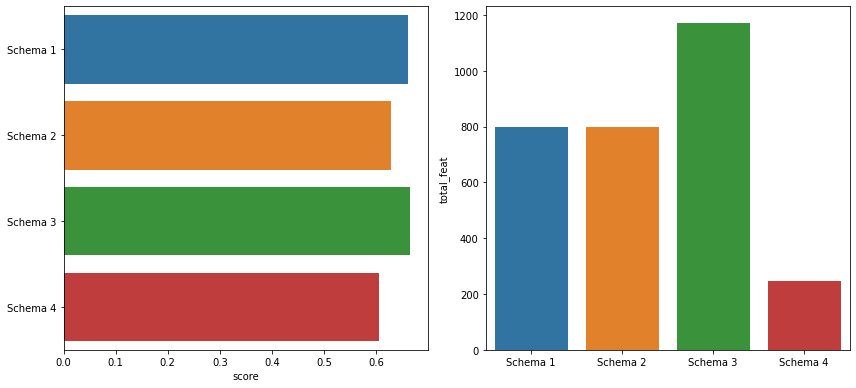

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.barplot(y=result.index, x=result['score'], ax= axes[0])

sns.barplot(x=result.index, y=result['total_feat'], ax= axes[1])

plt.show()